In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/ellis/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
class DeviceRunningTime:

    def __init__(self, name, bold=False, line_color=None):
        self.name = name
        self.bold = bold
        self.line_color = line_color
        self.sim_size = []
        self.add_event = []
        self.add_source = []
        self.set_bnd = []
        self.diffuse = []
        self.advect = []
        self.project_a = []
        self.project_b = []
        self.project_c = []
        self.runtime = []
        self.total_runtime = []

    def set_runtimes(self, size, ade, ads, sb, d, a, pa, pb, pc, r, tr):
        self.sim_size.append(size)
        self.add_event.append(ade)
        self.add_source.append(ads)
        self.set_bnd.append(sb)
        self.diffuse.append(d)
        self.advect.append(a)
        self.project_a.append(pa)
        self.project_b.append(pb)
        self.project_c.append(pc)
        self.runtime.append(r)
        self.total_runtime.append(tr)

    def plot(self, bounds=(64, 512, 0, 40), legend_size=8):
        plt.plot(self.sim_size, self.add_event, label="Add Event")
        plt.plot(self.sim_size, self.add_source, label="Add Source")
        plt.plot(self.sim_size, self.set_bnd, label="Set Bound")
        plt.plot(self.sim_size, self.diffuse, label="Diffuse")
        plt.plot(self.sim_size, self.advect, label="Advect")
        plt.plot(self.sim_size, self.project_a, label="Project A")
        plt.plot(self.sim_size, self.project_b, label="Project B")
        plt.plot(self.sim_size, self.project_c, label="Project C")
        plt.plot(self.sim_size, self.runtime, label="GPU", color="Red")
        plt.plot(self.sim_size, self.total_runtime, label="Total", linewidth=3)
        plt.legend(loc="upper left", fontsize=legend_size)
        plt.title(self.name)
        plt.xlabel("Simulation Size")
        plt.ylabel("Runtime (ms)")
        plt.xticks([128, 256, 512, 1024, 2048])
        #plt.axis((64, 512, 0, 40))
        plt.axis(bounds)
        
def plotDevices(deviceList, legend_size=8):
    for device in deviceList:
        plt.plot(device.sim_size, device.total_runtime, label=device.name, linewidth=(3 if device.bold else 1), color=device.line_color)
    plt.legend(loc="upper left", fontsize=legend_size)
    plt.title("Total Runtime")
    plt.xlabel("Simulation Size")
    plt.ylabel("Runtime (ms)")
    plt.xticks([128, 256, 512, 1024, 2048])
    plt.axis((64, 2048, 0, 1000))

In [3]:
macbookA = DeviceRunningTime("Apple: HD Graphics 4000 (Local Size=16x16)")
macbookA.set_runtimes(64, 0.044, 0.022, 0.405, 0.347, 0.020, 0.014, 0.265, 0.015, 1.067, 10)
macbookA.set_runtimes(128, 0.127, 0.065, 0.483, 1.020, 0.061, 0.036, 0.743, 0.042, 2.577, 10)
macbookA.set_runtimes(256, 0.459, 0.235, 0.855, 3.670, 0.242, 0.129, 2.526, 0.149, 8.266, 20)
macbookA.set_runtimes(512, 1.861, 0.964, 1.680, 21.952, 1.541, 0.931, 11.751, 1.015, 41.695, 57)
macbookA.set_runtimes(1024, 6.911, 3.549, 2.989, 124.011, 7.685, 4.134, 59.891, 4.465, 213.636, 217)
macbookA.set_runtimes(2048, 27.614, 14.155, 4.375, 463.270, 26.880, 15.328, 237.780, 16.143, 805.547, 775)

In [4]:
macbookB = DeviceRunningTime("Apple: HD Graphics 4000 (Local Size=8x8)")
macbookB.set_runtimes(64, 0.044, 0.022, 0.338, 0.408, 0.022, 0.015, 0.284, 0.017, 1.150, 7)
macbookB.set_runtimes(128, 0.127, 0.065, 0.482, 1.309, 0.072, 0.043, 0.892, 0.048, 3.037, 8)
macbookB.set_runtimes(256, 0.469, 0.232, 0.880, 4.533, 0.281, 0.146, 2.929, 0.165, 9.635, 27)
macbookB.set_runtimes(512, 1.894, 0.981, 1.736, 20.763, 1.562, 0.995, 12.943, 0.951, 41.825, 60)
macbookB.set_runtimes(1024, 6.940, 3.567, 2.870, 105.458, 7.064, 4.093, 66.727, 4.137, 200.857, 214)
macbookB.set_runtimes(2048, 27.551, 14.180, 4.323, 419.217, 27.809, 16.098, 270.744, 16.253, 796.175, 808)

In [5]:
macbookC = DeviceRunningTime("Apple: HD Graphics 4000 (Local Size=4x4)")
macbookC.set_runtimes(64, 0.045, 0.023, 0.340, 0.555, 0.029, 0.018, 0.348, 0.020, 1.377, 8)
macbookC.set_runtimes(128, 0.127, 0.065, 0.487, 1.746, 0.099, 0.054, 1.142, 0.061, 3.780, 12)
macbookC.set_runtimes(256, 0.448, 0.231, 0.852, 6.289, 0.372, 0.194, 3.992, 0.216, 12.595, 22)
macbookC.set_runtimes(512, 1.762, 0.920, 1.729, 26.404, 1.752, 1.038, 16.102, 0.981, 50.688, 63)
macbookC.set_runtimes(1024, 6.947, 3.576, 2.896, 119.450, 7.678, 4.599, 84.113, 4.490, 233.748, 248)
macbookC.set_runtimes(2048, 27.438, 14.079, 4.334, 479.720, 30.571, 18.544, 337.749, 18.049, 930.485, 954)

In [6]:
macbookD = DeviceRunningTime("Apple: HD Graphics 4000 (Local Size=2x2)")
macbookD.set_runtimes(64, 0.048, 0.022, 0.338, 0.853, 0.047, 0.027, 0.634, 0.035, 2.004, 7)
macbookD.set_runtimes(128, 0.149, 0.067, 0.502, 2.979, 0.167, 0.092, 1.976, 0.104, 6.038, 12)
macbookD.set_runtimes(256, 0.521, 0.230, 0.907, 11.263, 0.677, 0.346, 7.271, 0.384, 21.599, 35)
macbookD.set_runtimes(512, 2.088, 0.944, 1.757, 46.593, 3.040, 1.759, 28.539, 1.735, 86.456, 107)
macbookD.set_runtimes(1024, 8.024, 3.590, 2.863, 198.304, 13.060, 7.163, 138.037, 7.380, 378.422, 402)
macbookD.set_runtimes(2048, 31.731, 14.184, 4.340, 788.675, 51.949, 28.584, 551.187, 29.464, 1500.113, 1560)

In [7]:
macbookE = DeviceRunningTime("Apple: HD Graphics 4000 (Local Size=1x1)")
macbookE.set_runtimes(64, 0.066, 0.022, 0.353, 1.944, 0.110, 0.061, 1.282, 0.074, 3.911, 8)
macbookE.set_runtimes(128, 0.214, 0.065, 0.499, 6.815, 0.437, 0.219, 4.720, 0.263, 13.232, 26)
macbookE.set_runtimes(256, 0.830, 0.230, 0.865, 26.807, 1.823, 0.865, 18.016, 1.114, 50.550, 67)
macbookE.set_runtimes(512, 3.189, 0.927, 1.748, 111.563, 7.840, 3.927, 72.792, 4.584, 206.571, 232)
macbookE.set_runtimes(1024, 12.528, 3.566, 2.829, 464.256, 32.576, 16.458, 309.526, 18.819, 860.558, 934)

In [8]:
macbookCPU = DeviceRunningTime("Apple: Intel(R) Core(TM) i5-3210M CPU @ 2.50GHz (Local Size=128x1)", bold=True, line_color="Red")
macbookCPU.set_runtimes(128, 0.700, 0.350, 0.984, 3.419, 0.186, 0.128, 1.753, 0.099, 7.619, 11)
macbookCPU.set_runtimes(256, 2.653, 1.408, 1.292, 11.621, 0.611, 0.253, 5.805, 0.321, 23.964, 23)
macbookCPU.set_runtimes(512, 9.789, 5.207, 2.357, 40.675, 2.371, 1.384, 20.550, 1.223, 83.557, 79)
macbookCPU.set_runtimes(1024, 35.847, 19.465, 5.040, 153.125, 9.223, 3.644, 74.553, 4.419, 305.316, 286)
macbookCPU.set_runtimes(2048, 136.918, 72.726, 8.668, 605.247, 34.463, 14.588, 286.576, 16.756, 1175.941, 1085)

In [9]:
macbookBest = DeviceRunningTime("Apple: HD Graphics 4000 (Local Size=As Wide as Possible)", bold=True, line_color="Green")
macbookBest.set_runtimes(64, 0.044, 0.022, 0.336, 0.352, 0.020, 0.015, 0.266, 0.016, 1.071, 8)
macbookBest.set_runtimes(128, 0.126, 0.065, 0.513, 1.040, 0.060, 0.038, 0.758, 0.043, 2.643, 11)
macbookBest.set_runtimes(256, 0.452, 0.232, 0.864, 3.502, 0.224, 0.121, 2.210, 0.153, 7.757, 17)
macbookBest.set_runtimes(512, 1.772, 0.913, 1.688, 15.417, 1.139, 0.678, 7.911, 0.734, 30.252, 43)
macbookBest.set_runtimes(1024, 6.932, 3.566, 2.878, 70.300, 5.041, 3.193, 41.577, 3.264, 136.753, 155)
macbookBest.set_runtimes(2048, 27.523, 14.194, 4.427, 279.631, 19.839, 12.574, 159.745, 12.280, 530.212, 555)

In [10]:
macbookOld = DeviceRunningTime("One Color Channel", line_color="Blue")
macbookOld.set_runtimes(64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.490)
macbookOld.set_runtimes(128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.463)
macbookOld.set_runtimes(256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.090)
macbookOld.set_runtimes(512, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26.766)
macbookOld.set_runtimes(1024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 147.391)
macbookOld.set_runtimes(2048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 578.188)

In [11]:
macbookOldOld = DeviceRunningTime("Old Code", line_color="Purple")
macbookOldOld.set_runtimes(256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20)
macbookOldOld.set_runtimes(512, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42)
macbookOldOld.set_runtimes(1024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 196)
macbookOldOld.set_runtimes(2048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 717)

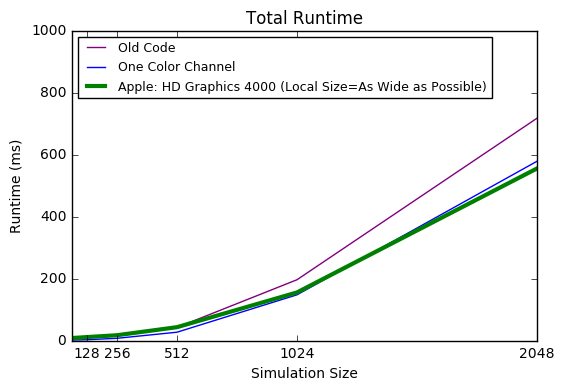

In [12]:
plotDevices([macbookOldOld, macbookOld, macbookBest], legend_size=9)

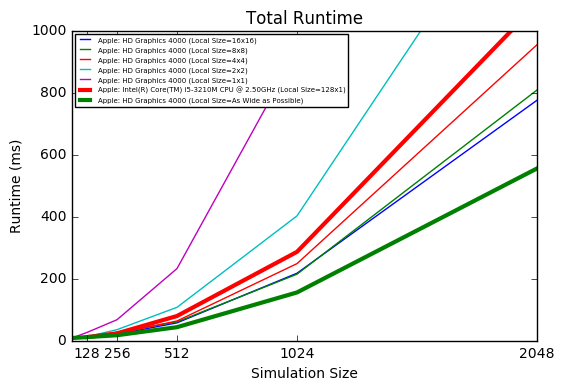

In [13]:
plotDevices([macbookA, macbookB, macbookC, macbookD, macbookE, macbookCPU, macbookBest], legend_size=5)

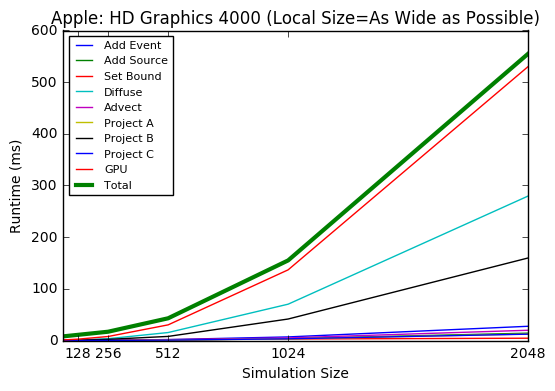

In [14]:
macbookBest.plot(bounds=(64, 2048, 0, 600), legend_size=8)

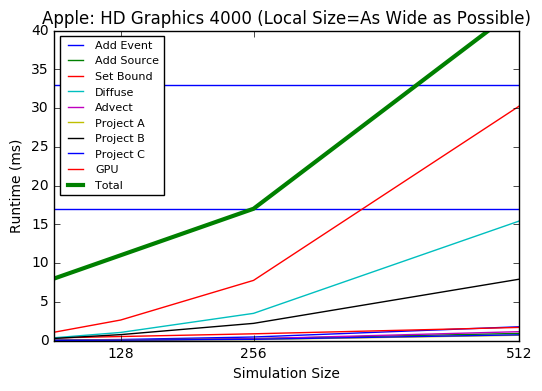

In [15]:
plt.axhline(y=33)
plt.axhline(y=17)
macbookBest.plot(bounds=(64, 512, 0, 40), legend_size=8)